# Chapter 4: Data Visualization

In [2]:
library(tidyverse)
library(ggplot2)
library(cowplot)
library(knitr)
library(NHANES)
library(ggbeeswarm)

set.seed(1234567)

# drop duplicated IDs within the NHANES dataset
NHANES=NHANES %>% dplyr::distinct(ID,.keep_all=TRUE)

NHANES$isChild <- NHANES$Age<18

NHANES_adult=NHANES %>%
  drop_na(Height) %>%
  subset(subset=Age>=18)

theme_set(theme_minimal(base_size = 14))

# setup colorblind palette
# from http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
# The palette with grey:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Figure 4.2

`geom_smooth()` using formula = 'y ~ x'


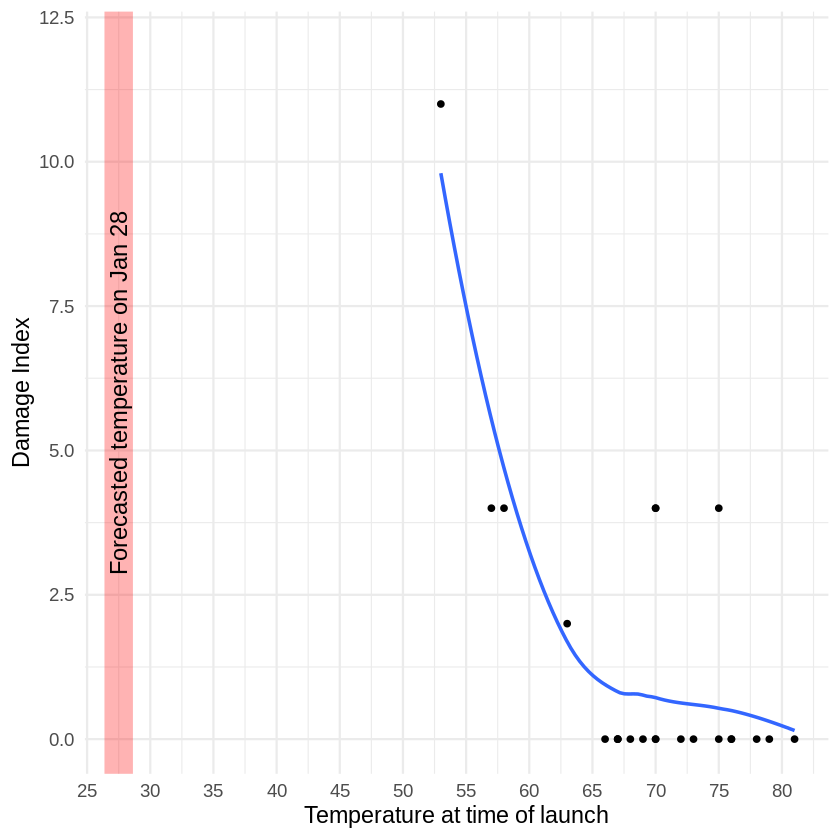

In [5]:
oringDf <- read.table("https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/orings.csv", sep = ",", header = TRUE)

oringDf %>%
  ggplot(aes(x = Temperature, y = DamageIndex)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, span = 1) + ylim(0, 12) +
  geom_vline(xintercept = 27.5, linewidth =8, alpha = 0.3, color = "red") +
  labs(
    y = "Damage Index",
    x = "Temperature at time of launch"
  ) +
  scale_x_continuous(breaks = seq.int(25, 85, 5)) +
  annotate(
    "text",
    angle=90,
    x = 27.5,
    y = 6,
    label = "Forecasted temperature on Jan 28",
    size=5
  )

## Figure 4.3

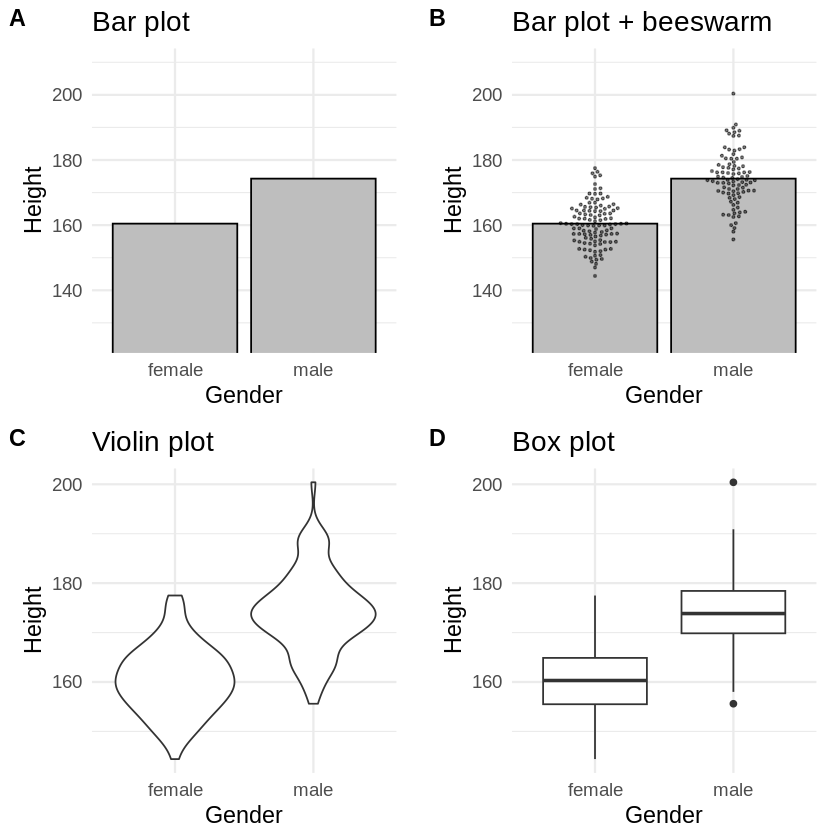

In [6]:

nhanes_sample=NHANES_adult %>% 
  sample_n(200) %>% 
  group_by(Gender) 

dfmean = nhanes_sample %>% 
  summarise(Height=mean(Height)) 

p1 = ggplot(dfmean,aes(x=Gender,y=Height)) + 
  geom_bar(stat="identity",color="black", fill="gray") + 
  coord_cartesian(ylim=c(125,210)) +
  ggtitle('Bar plot') + 
  theme(aspect.ratio=1)  

p2 = ggplot(dfmean,aes(x=Gender,y=Height)) + 
  geom_bar(stat="identity",,color="black", fill="gray") + 
  coord_cartesian(ylim=c(125,210)) +
  ggtitle('Bar plot + beeswarm') + 
  theme(aspect.ratio=1)  +
  geom_beeswarm(data=nhanes_sample,aes(x=Gender,y=Height), alpha=0.5, size=0.5, cex=2) 
  #geom_jitter(data=nhanes_sample,aes(x=Gender,y=Height),width=0.05,alpha=0.2)

p3 = ggplot(nhanes_sample,aes(x=Gender,y=Height)) + 
  geom_violin() + 
  ggtitle('Violin plot') + theme(aspect.ratio=1)

p4 = ggplot(nhanes_sample,aes(x=Gender,y=Height)) + 
  geom_boxplot() +  
  ggtitle('Box plot') + theme(aspect.ratio=1)


plot_grid(p1,p2,p3,p4,nrow=2,labels='AUTO')

## Figure 4.4

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'


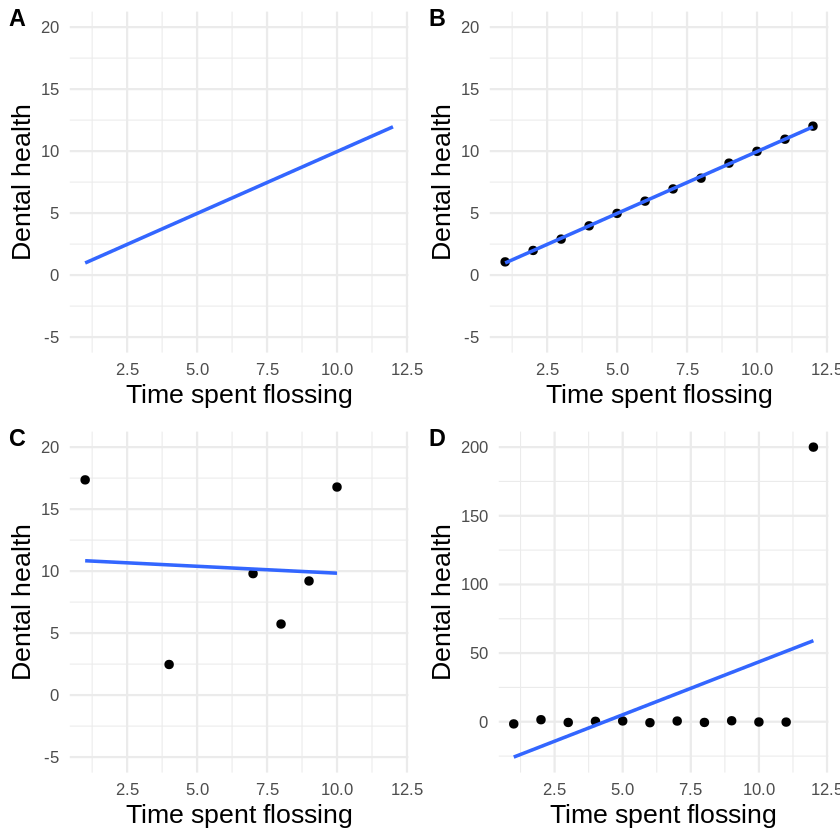

In [7]:
npts=12
df=data.frame(x=seq(1,npts)) %>%
  mutate(yClean=x + rnorm(npts,sd=0.1))
pointSize=2
t=theme(axis.text=element_text(size=10),axis.title=element_text(size=16))
p1=ggplot(df,aes(x,yClean)) +
  geom_smooth(method='lm',se=FALSE) + ylim(-5,20) +
  ylab('Dental health') + xlab('Time spent flossing') + t


p2=ggplot(df,aes(x,yClean)) +
  geom_point(size=pointSize) +
  geom_smooth(method='lm',se=FALSE) + ylim(-5,20) +
  ylab('Dental health') + xlab('Time spent flossing') + t

df = df %>%
  mutate(yDirty=x+ rnorm(npts,sd=10))

p3=ggplot(df,aes(x,yDirty)) +
  geom_point(size=pointSize) +
  geom_smooth(method='lm',se=FALSE)+ ylim(-5,20) +
  ylab('Dental health') + xlab('Time spent flossing') + t

df = df %>%
  mutate(yOutlier=rnorm(npts))
df$yOutlier[npts]=200


p4=ggplot(df,aes(x,yOutlier)) +
  geom_point(size=pointSize) +
  geom_smooth(method='lm',se=FALSE) +
  ylab('Dental health') + xlab('Time spent flossing') + t

plot_grid(p1,p2,p3,p4,nrow=2,labels='AUTO')

## Figure 4.5

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


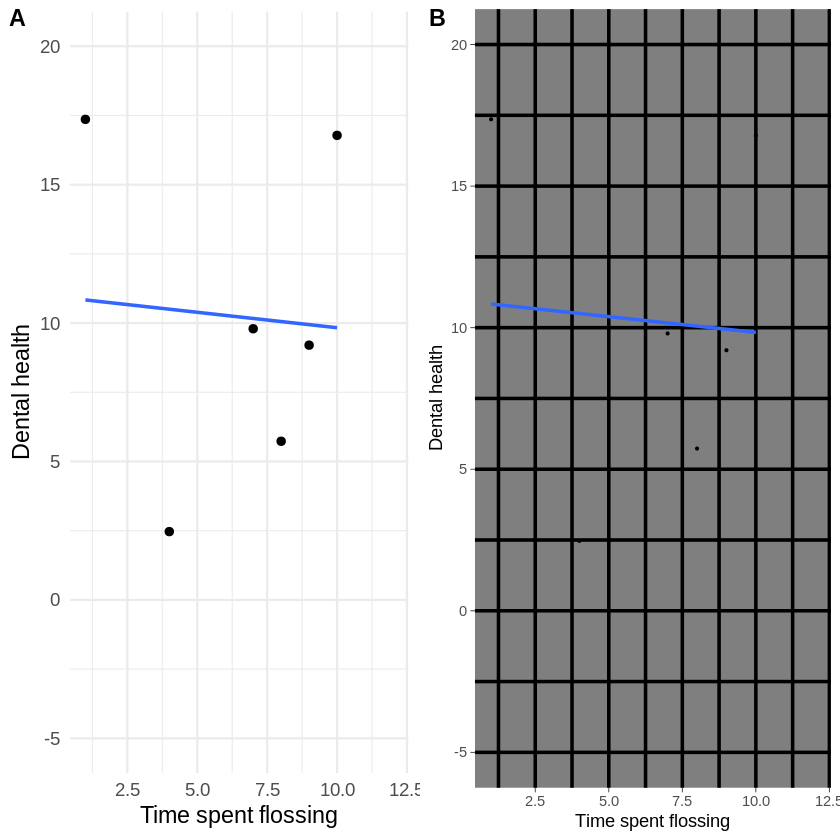

In [8]:
p1 = ggplot(df,aes(x,yDirty)) +
  geom_point(size=2) +
  geom_smooth(method='lm',se=FALSE)+ ylim(-5,20) +
  ylab('Dental health') + xlab('Time spent flossing')

p2 = ggplot(df,aes(x,yDirty)) +
  geom_point(size=0.5) +
  geom_smooth(method='lm',se=FALSE)+ ylim(-5,20) +
  ylab('Dental health') + xlab('Time spent flossing') +
    theme_dark() +
  theme(panel.grid.major = element_line(colour = "black",linewidth=1)) +
  theme(panel.grid.minor = element_line(colour = "black",linewidth=1))

plot_grid(p1,p2,labels='AUTO',ncol=2)

## Figure 4.7

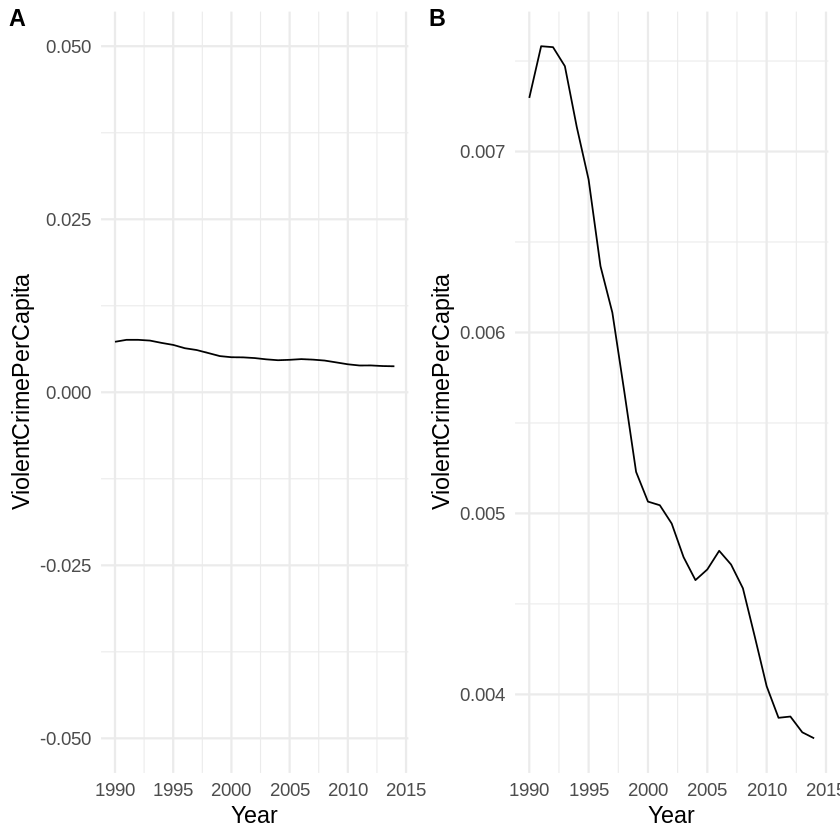

In [9]:
crimeData=read.table('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/CrimeStatebyState.csv',sep=',',header=TRUE) %>%
  subset(Year > 1989) %>%
  mutate(ViolentCrimePerCapita=Violent.crime.total/Population)

p1 = ggplot(crimeData,aes(Year,ViolentCrimePerCapita)) +
  geom_line() + ylim(-0.05,0.05)

p2 = ggplot(crimeData,aes(Year,ViolentCrimePerCapita)) +
  geom_line()


plot_grid(p1,p2,labels='AUTO')

## Figure 4.8


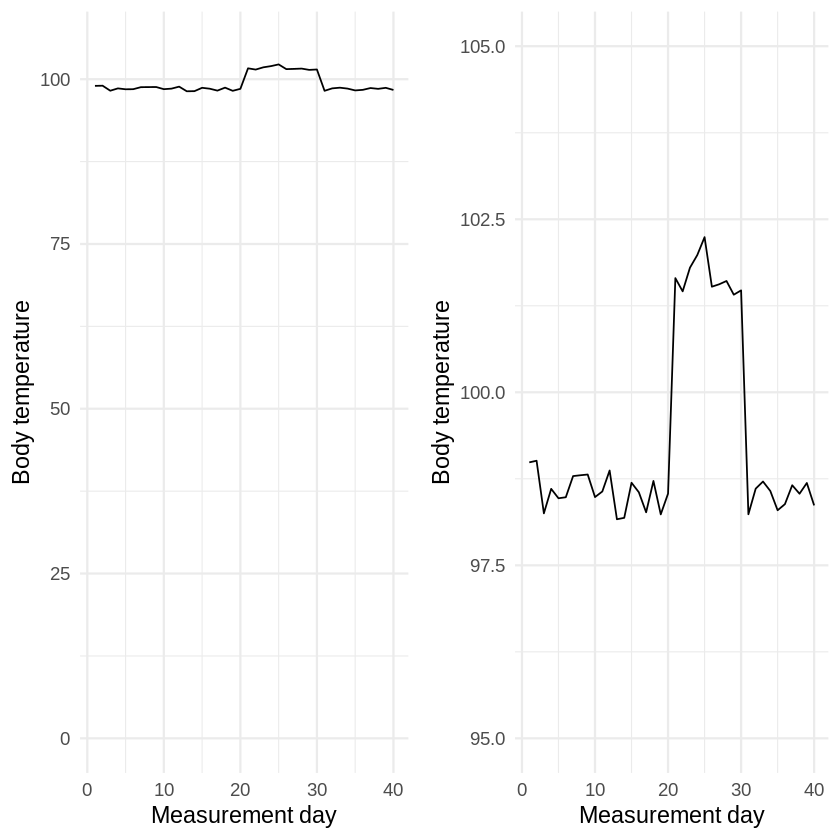

In [8]:
bodyTempDf=data.frame(days=c(1:40),temp=rnorm(40)*0.3 + 98.6)
bodyTempDf$temp[21:30]=bodyTempDf$temp[21:30]+3

p1 = ggplot(bodyTempDf,aes(days,temp)) +
  geom_line() +
  ylim(0,105) +
  labs(
    y = "Body temperature",
    x = "Measurement day"
    )
p2 = ggplot(bodyTempDf,aes(days,temp)) +
  geom_line() +
  ylim(95,105) +
  labs(
    y = "Body temperature",
    x = "Measurement day"
    )

plot_grid(p1,p2)

## Figure 4.9


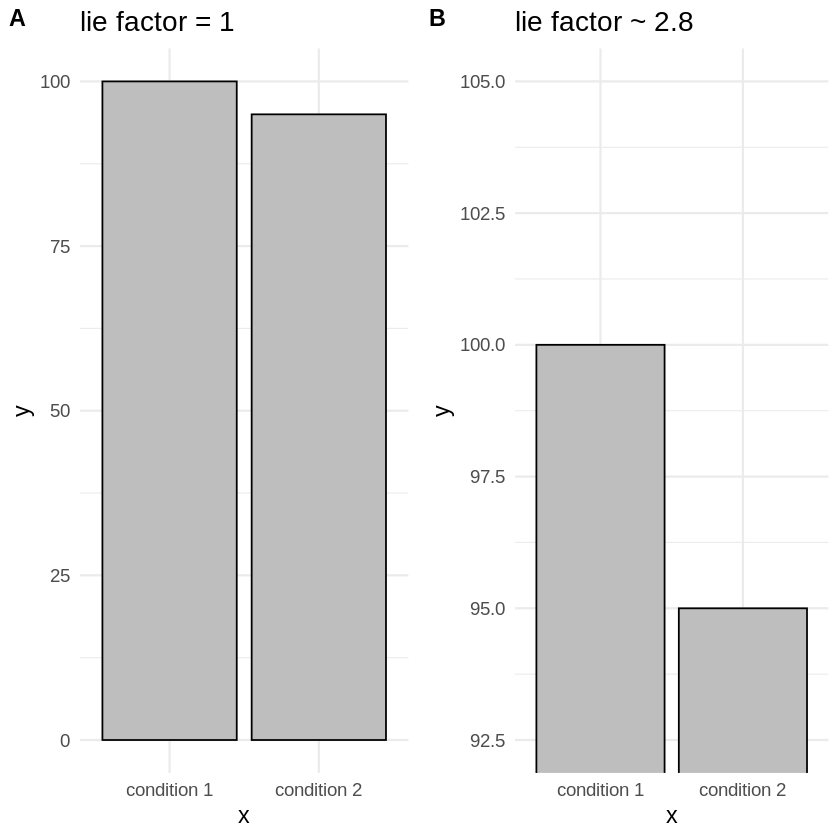

In [9]:
p1 = ggplot(data.frame(y=c(100,95),x=c('condition 1','condition 2')),aes(x=x,y=y)) +
  geom_col(color="black", fill="gray") +
  ggtitle('lie factor = 1')

p2 = ggplot(data.frame(y=c(100,95),x=c('condition 1','condition 2')),aes(x=x,y=y)) +
  geom_col(color="black", fill="gray") +
  coord_cartesian(ylim=c(92.5,105)) +
  ggtitle('lie factor ~ 2.8')

plot_grid(p1,p2,labels='AUTO')

## Figure 4.10


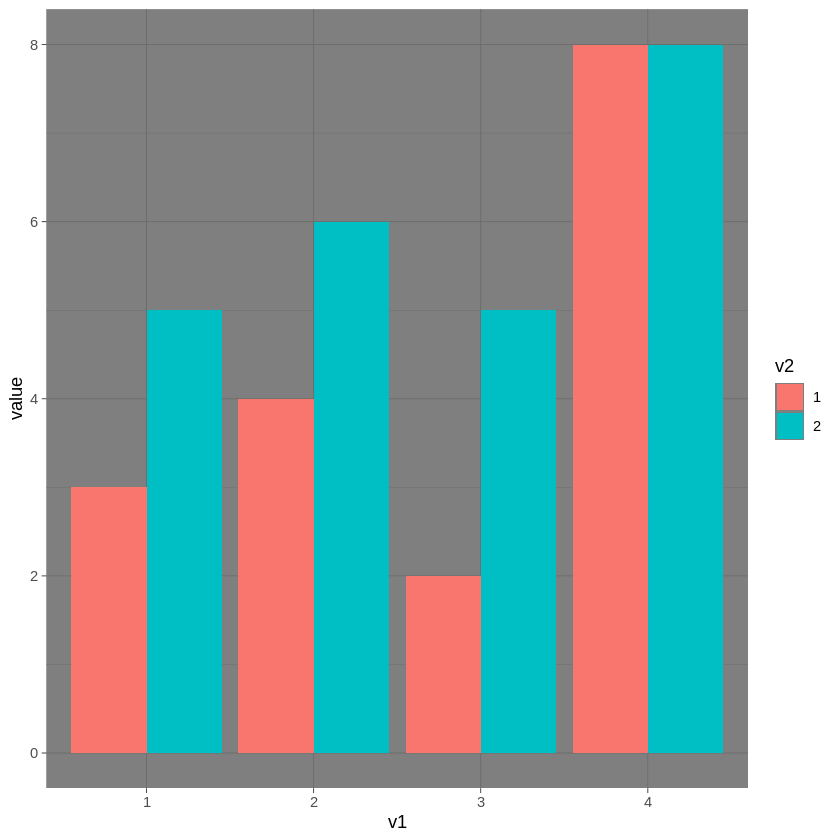

In [10]:
exampleDf = data.frame(value=c(3,5,4,6,2,5,8,8),
                       v1=as.factor(c(1,1,2,2,3,3,4,4)),
                       v2=as.factor(c(1,2,1,2,1,2,1,2)))
ggplot(exampleDf,aes(v1,value)) +
  theme_dark() +
  geom_bar(aes(fill = v2), position = "dodge",stat='identity')

## Figure 4.12


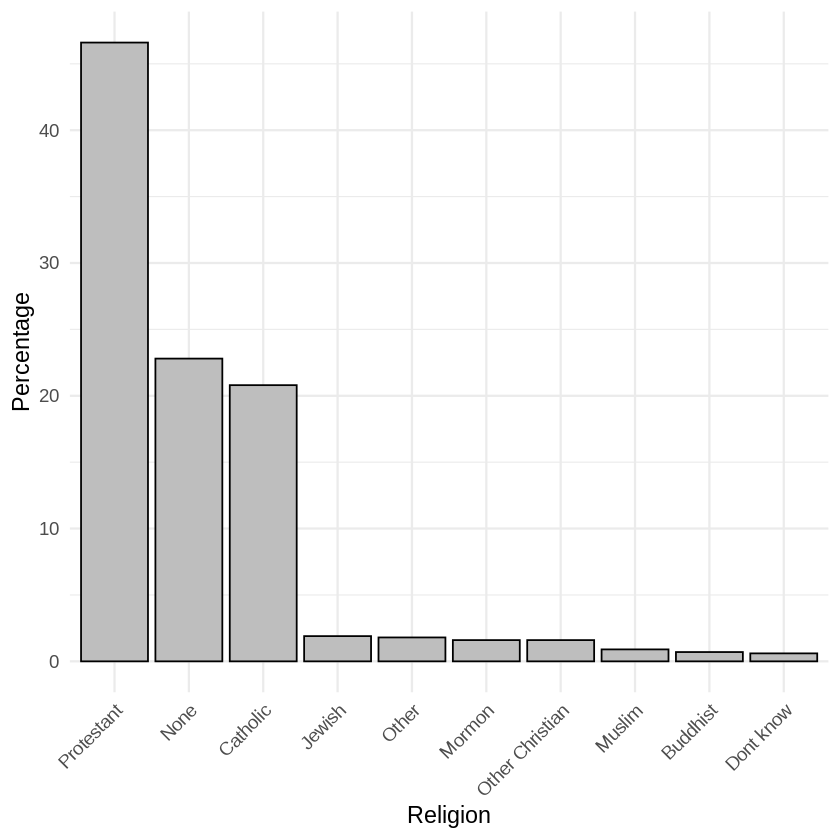

In [11]:
religionData=read.table('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/religion_data.txt',sep='\t')

names(religionData)=c('Religion','Percentage')
religionData = arrange(religionData,desc(Percentage))
religionData$Religion=factor(religionData$Religion,levels=religionData$Religion)
ggplot(religionData,aes(Religion,Percentage,label=Percentage)) +
  geom_bar(stat='identity',color="black", fill="gray") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

This plot allows the viewer to make comparisons based on the the length of the bars along a common scale (the y-axis). Humans tend to be more accurate when decoding differences based on these perceptual elements than based on area or color.

## Figure 4.13

Rows: 104 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


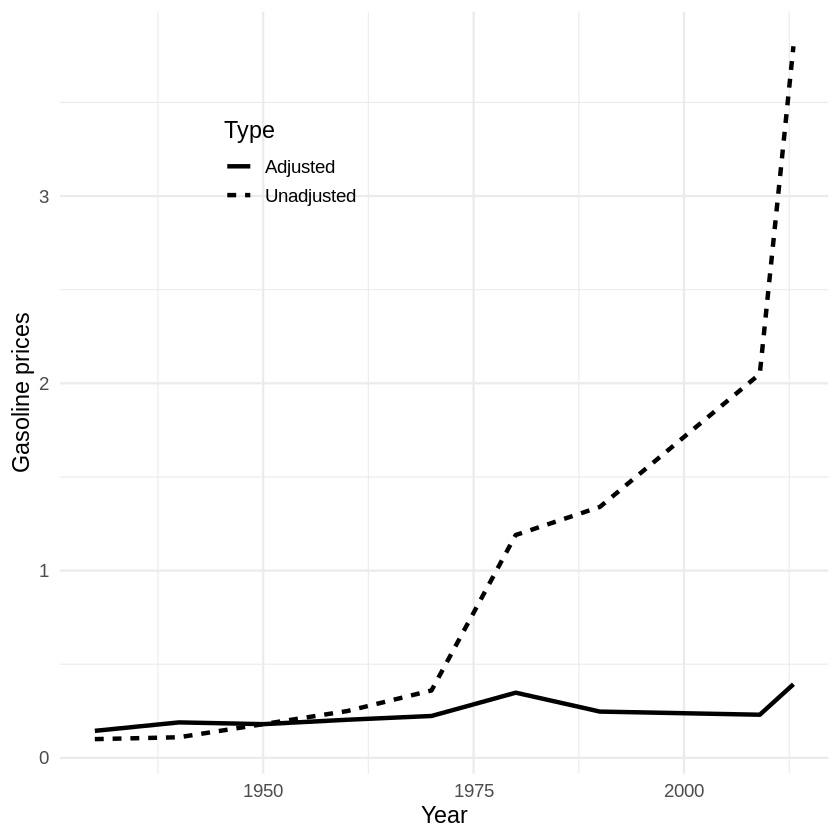

In [12]:
# Consumer Price Index data obtained from
# https://inflationdata.com/Inflation/Consumer_Price_Index/HistoricalCPI.aspx

# load CPI data
cpiData <- read_tsv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/cpi_data.txt',
                    col_names=FALSE) %>%
  dplyr::select(X1, X14) %>%
  rename(year = X1,
         meanCPI = X14)

# get reference cpi for 1950 dollars
cpiRef <- cpiData %>%
  filter(year==1950) %>%
  pull(meanCPI)

gasPriceData <- tibble(year=c(1930,1940,1950,1960,1970,1980,1990,2009,2013),
                        Unadjusted=c(.10,.11,.18,.25,.36,1.19,1.34,2.05,3.80))

allData <- left_join(gasPriceData,cpiData,by='year') %>%
  mutate(Adjusted = Unadjusted/(meanCPI/cpiRef)) %>%
  gather(key="Type", value="Price", -meanCPI, -year) %>%
  mutate(Type=as.factor(Type))

ggplot(allData,aes(year,Price,linetype=Type)) +
  geom_line(size=1.25) +
  ylab('Gasoline prices') + xlab('Year') +
  theme(legend.position = c(0.3,0.8))